In [46]:
import numpy as np

In [71]:
# open C_cells.mat file
import h5py

def printkeys(name):
    with h5py.File(name, 'r') as f:
        print(f.keys())
        for key in f.keys():
            print(f[key])
            

In [169]:
printkeys('Data analysis/Data analysis/Deconstructing Gastrulation - Data/Img_1620 (intercalations)/intercalation_time.mat')

with h5py.File('Data analysis/Data analysis/Deconstructing Gastrulation - Data/Img_1620 (intercalations)/intercalation_time.mat', 'r') as f:
    print(f["/#refs#"]["c"][:].shape)

<KeysViewHDF5 ['#refs#', 'intercalation_time']>
<HDF5 group "/#refs#" (5 members)>
<HDF5 dataset "intercalation_time": shape (1, 4), type "|O">
(1, 487)


In [144]:
printkeys("Data analysis/Data analysis/Deconstructing Gastrulation - Data/Img_1620 (intercalations)/cell_behaviors.mat")

with h5py.File("Data analysis/Data analysis/Deconstructing Gastrulation - Data/Img_1620 (intercalations)/cell_behaviors.mat", 'r') as f:
    behaviors = [np.array(f['cell_behaviors'][b]) for b in f['cell_behaviors'].keys()]

<KeysViewHDF5 ['#refs#', 'cell_behaviors']>
<HDF5 group "/#refs#" (1 members)>
<HDF5 group "/cell_behaviors" (8 members)>


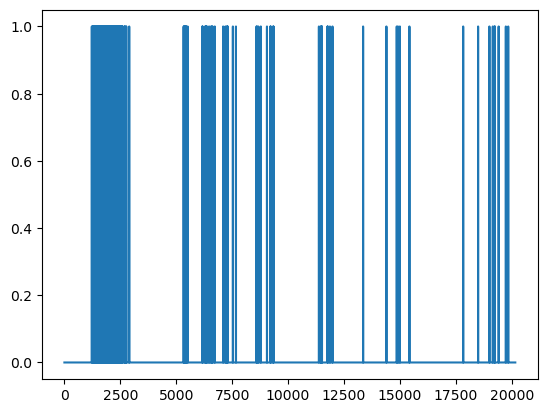

In [161]:
plt.plot(behaviors[3][0])

In [89]:
name = "Data analysis/Data analysis/Deconstructing Gastrulation - Data/Img_1620 (intercalations)/cell_behaviors.mat"

with h5py.File(name, 'r') as f:
    print(f.keys())
    print(f['cell_behaviors']["do_nothing"])

<KeysViewHDF5 ['#refs#', 'cell_behaviors']>
<HDF5 dataset "do_nothing": shape (1, 20155), type "|u1">


In [254]:
name = "Data analysis/Data analysis/Deconstructing Gastrulation - Data/Img_1830 (divisions)/projected_daughters_centroids.mat"

with h5py.File(name, 'r') as f:
    print(f.keys())
    print(f["projected_daughter_cells"])
    cc = np.array(f["projected_daughter_cells"])

<KeysViewHDF5 ['is_side_A', 'projected_daughter_cells']>
<HDF5 dataset "projected_daughter_cells": shape (2, 3, 76), type "<f8">


In [259]:
cc[:,:,2]#["daughters"]

array([[172.05099487, 384.68945312, 152.99911499],
       [169.45051575, 387.88381958, 155.69972229]])

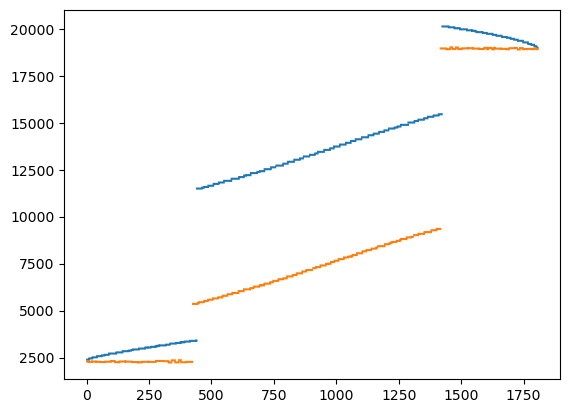

In [216]:
plt.plot(cc[0])
plt.plot(cc[1500])


In [230]:
name = "Data analysis/Data analysis/Deconstructing Gastrulation - Data/Img_1830 (divisions)/Mesh/V_coords.mat"

with h5py.File(name, 'r') as f:
    print(f.keys())
    print(f["V_coords"])
    c_cells = np.array(f["V_coords"])

<KeysViewHDF5 ['V_coords']>
<HDF5 dataset "V_coords": shape (5, 521839), type "<f8">


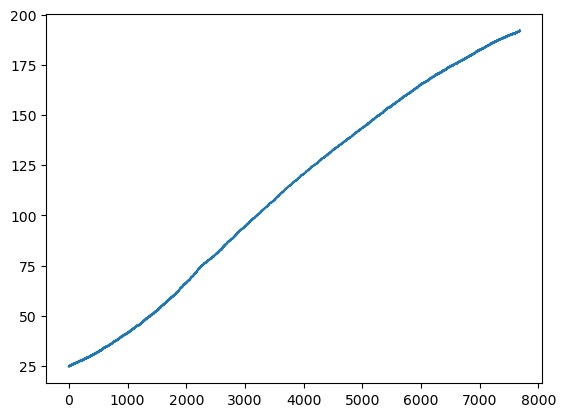

In [235]:
plt.plot(c_cells[4, c_cells[0] == 30])

0
0
0
0
1
10662
2
10662
3
10662
4
10662
5
10632
6
10588
7
10552
8
10500
9
10414
10
10303
11
10124
12
9980
13
9792
14
9640
15
9500
16
9342
17
9243
18
9079
19
8923
20
8755
21
8592
22
8399
23
8259
24
8138
25
8042
26
7900
27
7840
28
7771
29
7733
30
7684
31
7647
32
7634
33
7560
34
7523
35
7517
36
7528
37
7531
38
7542
39
7536
40
7559
41
7596
42
7657
43
7730
44
7785
45
7880
46
7964
47
8043
48
8156
49
8226
50
8313
51
8396
52
8474
53
8526
54
8610
55
8654
56
8700
57
8740
58
8778
59
8806
0
0


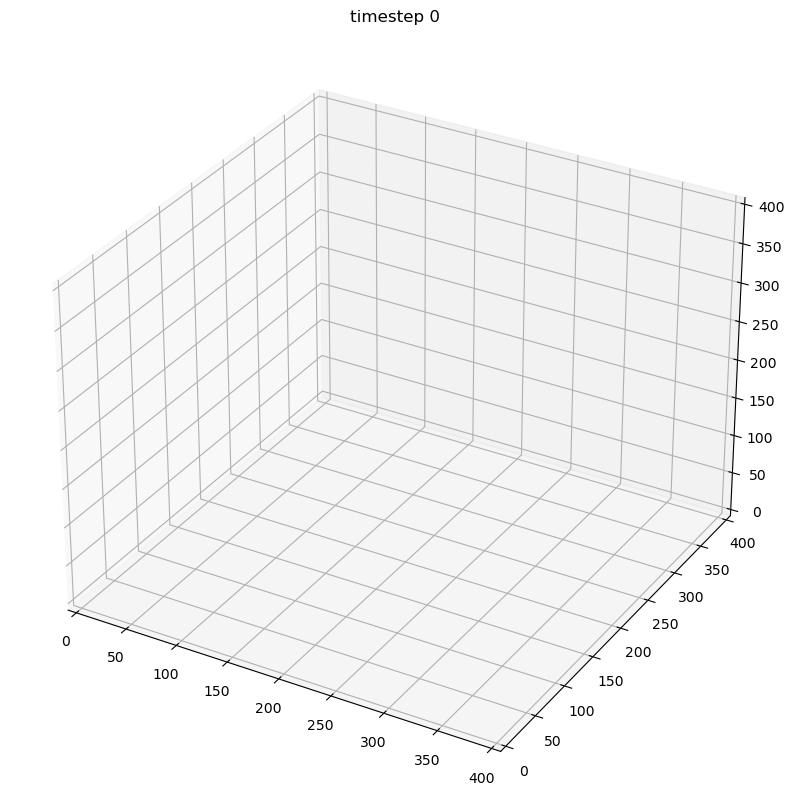

In [261]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# make 3d animation of the data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

N_fist_idx = (c_cells[0,:] == 1).sum()



def func(i):
    print(i)
    ax.clear()
    indx = c_cells[0,:] == i

    # make sure there is only N_fist_idx cells in any frame
    if indx.sum() > N_fist_idx:
        trueindx = np.where(indx)[0]
        indx[trueindx[N_fist_idx:]] = False

    print(indx.sum())
    ax.scatter(500-c_cells[3,indx], c_cells[2,indx],c_cells[4,indx], c='blue', marker='o')
    ax.set_title(f"timestep {i}")

    ax.set_xlim(0, 400)
    ax.set_ylim(0, 400)
    ax.set_zlim(0, 400)



ani = FuncAnimation(fig, func, frames=range(0, 60), interval=100)

ani.save('animation.mp4')

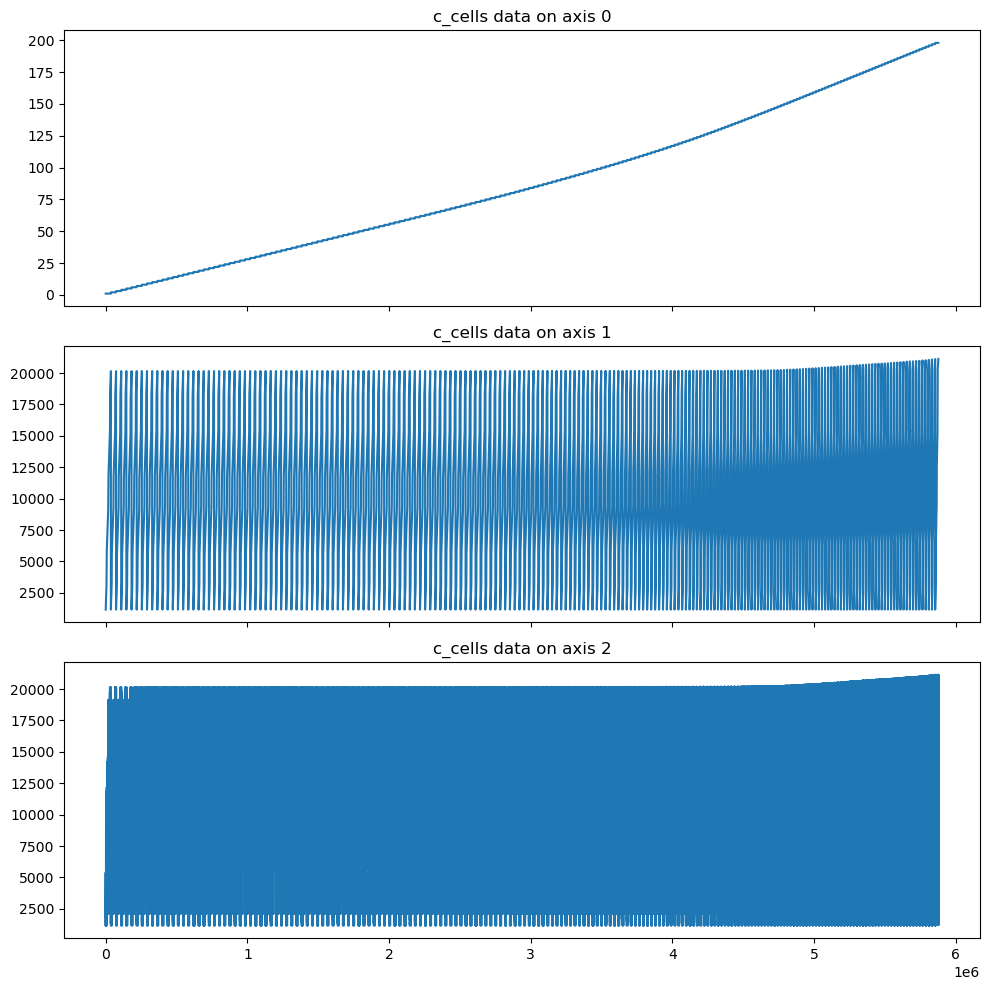

In [180]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=False)
for i in range(3):
    axs[i].plot(c_cells[i])
    axs[i].set_title(f"c_cells data on axis {i}")
fig.tight_layout()
plt.show()